# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تطبیق ویژگی‌ها -  Feature Matching</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مبانی Brute-Force Matcher</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
تطبیق Brute-Force از لحاظ الگوریتم واقعا ساده است. هربار یک ویژگی را از تصویر اول در نظر گرفته و  براساس فاصله‌ی توصیفگر این ویژگی از سایر توصیفگرهای متعلق به ویژگی‌های تصویر دوم نزدیکترین مطابقت ویژگی در نظر گرفته شده از تصویر اول با ویژگی تصویر دوم را پیدا می‌کند.
<br/>
برای تطبیق BF، ابتدا باید شی BFMatcher را با استفاده از ()cv.BFMatcher ایجاد کنیم.
<br/>
این شئ دو پارامتر اختیاری می گیرد:
<br/>
اولین مورد normType است که نحوه‌ی اندازه گیری فاصله مورد استفاده را مشخص می کند که به طور پیش فرض cv.NORM_L2 است.
این فاصله پیش فرض برای SIFT، SURF و الگوریتمهای مشابه این روش‌ها خوب است (cv.NORM_L1 نیز وجود دارد). 
اما برای توصیفگرهای مبتنی بر رشته باینری مانند ORB، BRIEF، BRISK و غیره، باید از cv.NORM_HAMMING استفاده شود که از فاصله همینگ به عنوان اندازه گیری استفاده می کند.
<br/>
اگر ORB از WTA_K == 3 یا 4 استفاده می کند، باید از cv.NORM_HAMMING2 استفاده شود.
<br/>
پارامتر دوم متغیری به نام CrossCheck و از جنس بولین یا bool است. این متغیر به طور پیش‌فرض مقدار False دارد ولی اگر این آرگومان را True بزاریم فقط مواردی را بر میگرداند که اگر زوج مرتب (i,j) را این‌گونه در نظر بگیریم که توصیفگر i-ام از تصویر A با توصیفگر j-ام از تصویر B تطبیق پیدا کرده است، شرایط برعکس هم برایش صدق کند. یعنی این دو ویژگی با عوض کردم جای A و B بازهم باید باهم منطبق بشوند که نتایج مطمئنتری را برمیگرداند!
<br/>
پس از ایجاد این شئ، دو روش مهم BFMatcher.match() و BFMatcher.knnMatch() را خواهیم داشت. اولی بهترین تطبیق را برمی گرداند، درحالیکه روش دوم k بهترین انبطباق را برمی‌گرداند که k توسط کاربر مشخص می‌شود. 
</div>

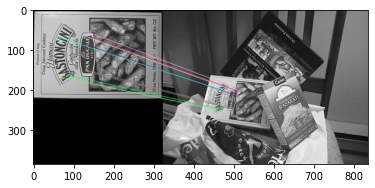

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('images/box.png',0)          # queryImage
img2 = cv2.imread('images/box_in_scene.png',0) # trainImage

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show();

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تطبیق Brute-Force با توصیفگرهای SIFT و تست نسبت 
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
این بار از BFMatcher.knnMatch() برای بدست آوردن k بهترین تطابق استفاده می کنیم. در این مثال، k=2 را می گیریم تا بتوانیم آزمون نسبتی را که D.Lowe ، نویسنده‌ی SIFT در مقاله خود توضیح داده است، اعمال کنیم.
</div>

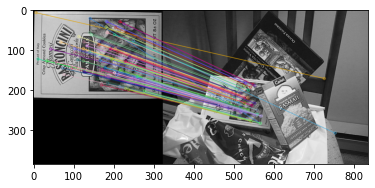

(<matplotlib.image.AxesImage at 0x22b80023700>, None)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('images/box.png', 0)          # queryImage
img2 = cv2.imread('images/box_in_scene.png', 0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

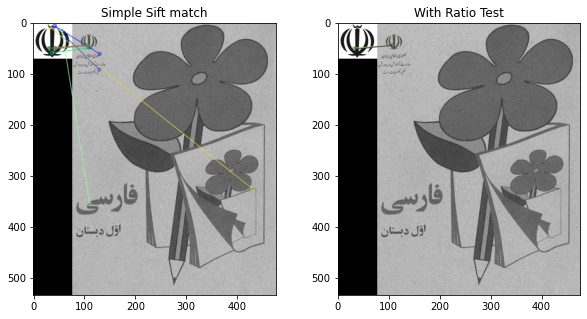

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('images/arm.jpg', 0)          # queryImage
img2 = cv2.imread('images/ketab.jpg', 0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.match(des1,des2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img4 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


plt.figure(figsize=[10,5])
plt.subplot(121),plt.imshow(img3, cmap='gray'),plt.title('Simple Sift match');
plt.subplot(122),plt.imshow(img4, cmap='gray'),plt.title('With Ratio Test');

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Matcher مبتنی بر FLANN 
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
FLANN مخفف Fast Library for Approximate Nearest Neighbors است. این شامل مجموعه ای از الگوریتم های بهینه سازی شده برای جستجوی سریع نزدیکترین همسایه در مجموعه داده های بزرگ و برای ویژگی های ابعادی بالا است. برای مجموعه داده های بزرگ سریعتر از BFMatcher کار می کند.</div>

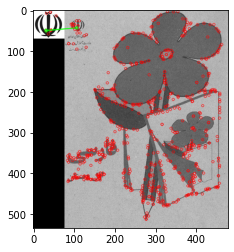

(<matplotlib.image.AxesImage at 0x22bf66260d0>, None)

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('images/arm.jpg', 0)
img2 = cv2.imread('images/ketab.jpg', 0) 

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

Read more: 
* [RANSAC](https://opencv.org/evaluating-opencvs-new-ransacs/)
* [More about Machine Learning](https://class.vision/product/intro-to-ai-ml-deep/)

https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html